In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import numpy as np

In [2]:
def f_beta(precision, recall, beta=2):
    if (beta**2 * precision) + recall == 0:
        return 0
    return ((1 + beta**2) * precision * recall
                ) / ((beta**2 * precision) + recall)

In [16]:
def plot_threshold_results(data):
    colors = sns.color_palette("husl", 3)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    thresholds = [float(t) for t in data.keys()]
    f1s = [f_beta(float(d['precision']), float(d['recall'])) for d in data.values()]
    recalls = [d['recall'] for d in data.values()]
    precisions = [d['precision'] for d in data.values()]

    data = {
        "F-β": f1s,
        "Recall": recalls,
        "Precision": precisions,
    }

    for i, (label, scores) in enumerate(data.items()):
        # Plot the losses
        ax.plot(thresholds, scores, color=colors[i], label=label)
        ax.set_title('Loss per Epoch')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Score')
        ax.set_xticks(np.arange(0, 1, 0.1))
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Find the first threshold where the precision is above 0.9
    threshold_index = next((i for i, precision in enumerate(precisions) if precision > 0.9), None)
    if threshold_index is not None:
        threshold = thresholds[threshold_index]
        ax.axvline(threshold, color='black', linestyle='--')
        ax.text(threshold + 0.01, 0.8, f"Threshold = {threshold:.3f}", fontsize=12)

    ax.legend()
    plt.tight_layout(pad=3)
    plt.show()


In [17]:
def table_threshold_results(data):
    table = PrettyTable()
    table.field_names = ["", "Threshold", "F1", "Recall", "Precision"]

    threshold_index = next((i for i, precision in enumerate(
        [d['precision'] for d in data.values()]) if precision > 0.9), None)

    for i, (threshold, scores) in enumerate(data.items()):
        f1 = scores['f1']
        recall = scores['recall']
        precision = scores['precision']

        if i == threshold_index:
            table.add_row(["\u2192", '\033[1m' + str(threshold) + '\033[0m', '\033[1m' + str(f1) + '\033[0m',
                          '\033[1m' + str(recall) + '\033[0m', '\033[1m' + str(precision) + '\033[0m'])
        else:
            table.add_row(["", threshold, f1, recall, precision])

    print(table)

In [18]:
def plot_curves(data):
    thresholds = [float(key) for key in data.keys()]
    precision = [data[str(threshold)]['precision'] for threshold in thresholds]
    recall = [data[str(threshold)]['recall'] for threshold in thresholds]
    tpr = [data[str(threshold)]['tpr'] for threshold in thresholds]
    fpr = [data[str(threshold)]['fpr'] for threshold in thresholds]

    sns.set(style='darkgrid')
    plt.figure(figsize=(8, 4))

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

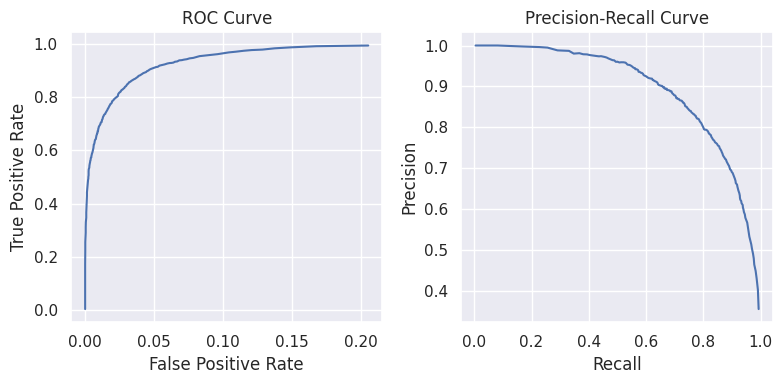

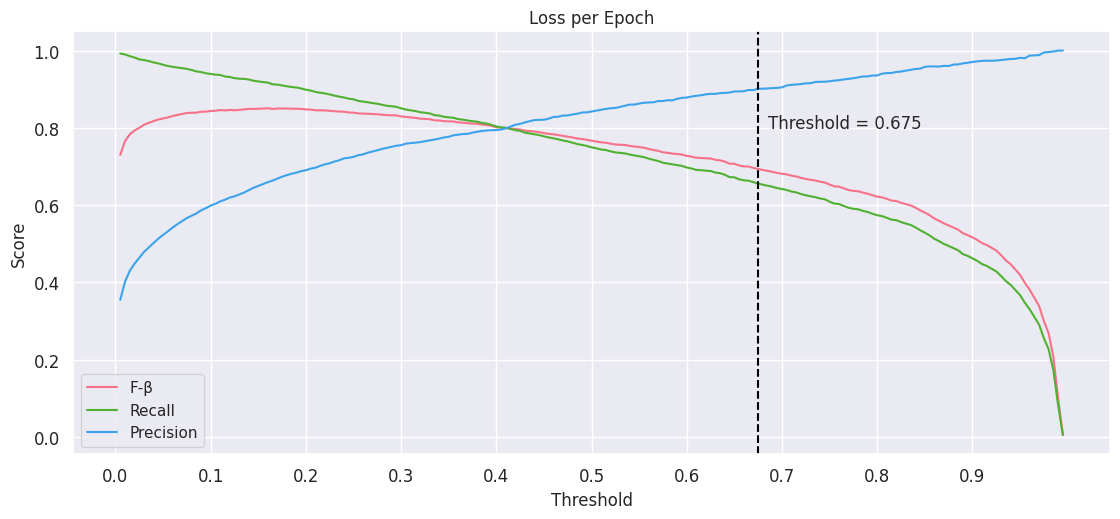

+---+-----------+--------+--------+-----------+
|   | Threshold |   F1   | Recall | Precision |
+---+-----------+--------+--------+-----------+
|   |   0.005   | 0.5228 | 0.9925 |   0.3548  |
|   |    0.01   | 0.5716 | 0.9899 |   0.4018  |
|   |   0.015   | 0.5986 | 0.9855 |   0.4298  |
|   |    0.02   | 0.6155 | 0.982  |   0.4482  |
|   |   0.025   | 0.6289 | 0.9772 |   0.4637  |
|   |    0.03   | 0.6425 | 0.9754 |   0.479   |
|   |   0.035   | 0.6522 | 0.9728 |   0.4905  |
|   |    0.04   | 0.6616 | 0.9693 |   0.5022  |
|   |   0.045   | 0.6705 | 0.9667 |   0.5133  |
|   |    0.05   | 0.6778 | 0.9632 |   0.5229  |
|   |   0.055   | 0.6847 | 0.9601 |   0.5321  |
|   |    0.06   | 0.6921 | 0.9579 |   0.5418  |
|   |   0.065   | 0.6988 | 0.9561 |   0.5506  |
|   |    0.07   | 0.7047 | 0.9544 |   0.5585  |
|   |   0.075   | 0.7105 | 0.9526 |   0.5665  |
|   |    0.08   | 0.7142 | 0.9496 |   0.5723  |
|   |   0.085   | 0.7179 | 0.9461 |   0.5784  |
|   |    0.09   | 0.7237 | 0.9443 |   0.

In [21]:
threshold_data = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Primary/lightning_logs/agb-10/checkpoints/converted/epoch=2_threshold_results.json'
with open(threshold_data, 'r') as f:
    data = json.load(f)

plot_curves(data)
plot_threshold_results(data)
table_threshold_results(data)

In [98]:
# ratios = {
#     "AGB-1": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Primary/lightning_logs/agb-1/checkpoints/converted/epoch=2_threshold_results.json',
#     "AGB-5": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Primary/lightning_logs/agb-5/checkpoints/converted/epoch=2_threshold_results.json',
#     "AGB-10": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Primary/lightning_logs/agb-10/checkpoints/converted/epoch=2_threshold_results.json',
# }

ratios = {
    "100:100:1": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-100-1/checkpoints/converted/epoch=2_threshold_results.json',
    "100:200:50": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-200-50/checkpoints/converted/epoch=1_threshold_results.json',
    "100:200:100": '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/blank-200-100/checkpoints/converted/epoch=1_threshold_results.json',
}

ratio_data_jigsaw = {}
ratio_data_sn = {}
for ratio, json_path in ratios.items():
    with open(json_path, 'r') as f:
        data = json.load(f)

        threshold_index = next((i for i, precision in enumerate([d['precision'] for d in data['JIGSAW'].values()]) if precision > 0.9), None)
        threshold = list(data['JIGSAW'].keys())[threshold_index]
        ratio_data_jigsaw[ratio] = "{:5.3f}".format(float(threshold))

        if max([d['precision'] for d in data['SN'].values()]) < 0.9:
            prec_val = max([d['precision'] for d in data['SN'].values()])
            print(f"{json_path.split('/')[-4]} has no precision of 0.9, using {prec_val}")
        else:
            prec_val = 0.97
        threshold_index = next((i for i, precision in enumerate([d['precision'] for d in data['SN'].values()]) if precision >= prec_val ), None)
        threshold = list(data['SN'].keys())[threshold_index]
        ratio_data_sn[ratio] = "{:5.3f}".format(float(threshold))

table = PrettyTable()
table.field_names = ["Data Ratio", "Threshold"]
print("Jigsaw Results")
for ratio, threshold in ratio_data_jigsaw.items():
    table.add_row([ratio, threshold])
print(table)

table = PrettyTable()
table.field_names = ["Data Ratio", "Threshold"]
print("Secondary Neutral Results")
for ratio, threshold in ratio_data_sn.items():
    table.add_row([ratio, threshold])
print(table)


blank-200-100 has no precision of 0.9, using 0.6432
Jigsaw Results
+-------------+-----------+
|  Data Ratio | Threshold |
+-------------+-----------+
|  100:100:1  |   0.540   |
|  100:200:50 |   0.685   |
| 100:200:100 |   0.725   |
+-------------+-----------+
Secondary Neutral Results
+-------------+-----------+
|  Data Ratio | Threshold |
+-------------+-----------+
|  100:100:1  |   0.775   |
|  100:200:50 |   0.985   |
| 100:200:100 |   0.835   |
+-------------+-----------+
